In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Outlier Treatment

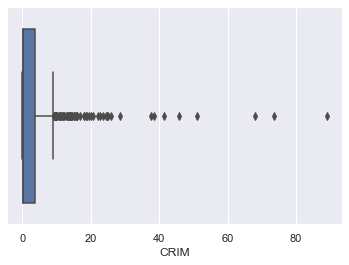

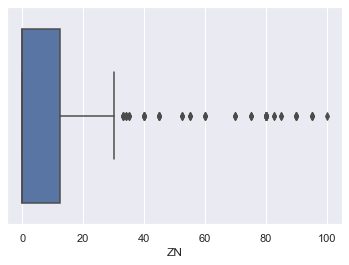

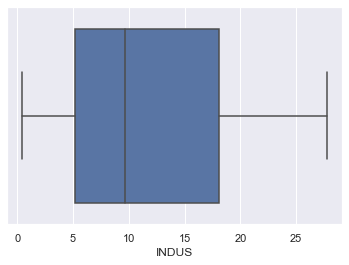

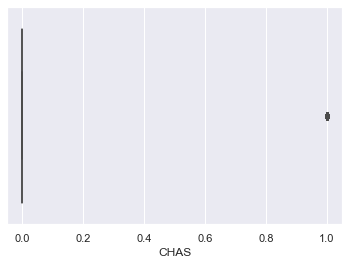

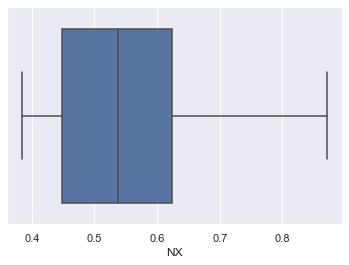

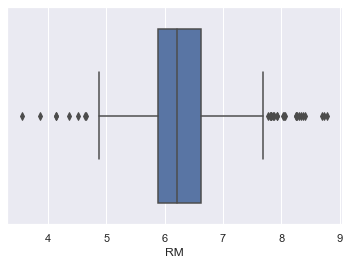

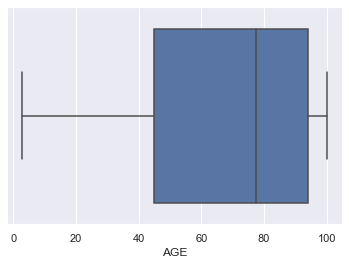

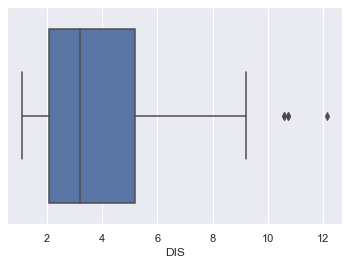

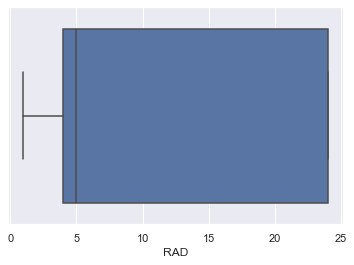

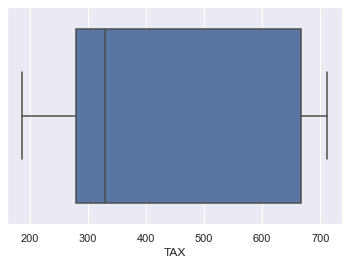

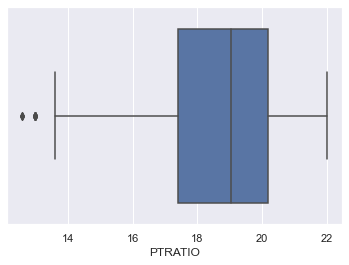

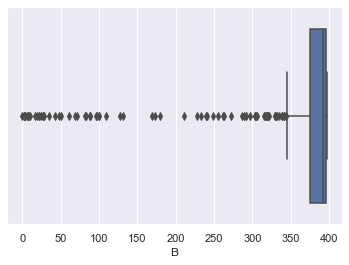

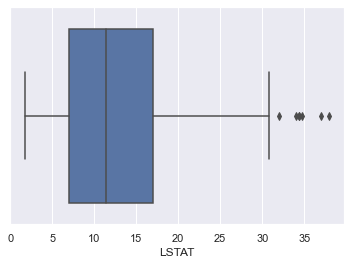

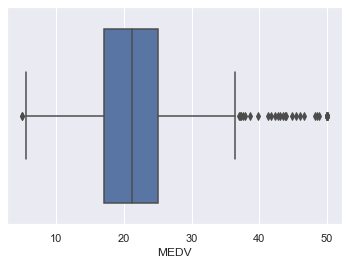

In [8]:
for i in list(data.columns):
    sns.boxplot(data[i])
    plt.show()

In [9]:
for k,v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    lrange = q1-1.5*iqr
    urange = q3+1.5*iqr
    v_col = v[(v<=lrange)|(v>=urange)]
    percent = np.shape(v_col)[0]*100/np.shape(data)[0]
    print('Column %s outlier percent: %.2f%%' %(k,percent))

Column CRIM outlier percent: 13.04%
Column ZN outlier percent: 13.44%
Column INDUS outlier percent: 0.00%
Column CHAS outlier percent: 100.00%
Column NX outlier percent: 0.00%
Column RM outlier percent: 5.93%
Column AGE outlier percent: 0.00%
Column DIS outlier percent: 0.99%
Column RAD outlier percent: 0.00%
Column TAX outlier percent: 0.00%
Column PTRATIO outlier percent: 2.96%
Column B outlier percent: 15.22%
Column LSTAT outlier percent: 1.38%
Column MEDV outlier percent: 7.91%


In [10]:
data = data[~(data['MEDV']>=50)]

In [11]:
data.shape

(490, 14)

In [12]:
for k,v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    lrange = q1-1.5*iqr
    urange = q3+1.5*iqr
    v_col = v[(v<=lrange)|(v>=urange)]
#     percent = np.shape(v_col)[0]*100/np.shape(data)[0]
    per = v_col.shape[0]*100/v.shape[0]
    print('Column %s outlier percent: %.2f%%' %(k,per))

Column CRIM outlier percent: 13.27%
Column ZN outlier percent: 13.27%
Column INDUS outlier percent: 0.00%
Column CHAS outlier percent: 100.00%
Column NX outlier percent: 0.00%
Column RM outlier percent: 4.69%
Column AGE outlier percent: 0.00%
Column DIS outlier percent: 1.02%
Column RAD outlier percent: 0.00%
Column TAX outlier percent: 0.00%
Column PTRATIO outlier percent: 2.65%
Column B outlier percent: 15.92%
Column LSTAT outlier percent: 1.43%
Column MEDV outlier percent: 4.49%


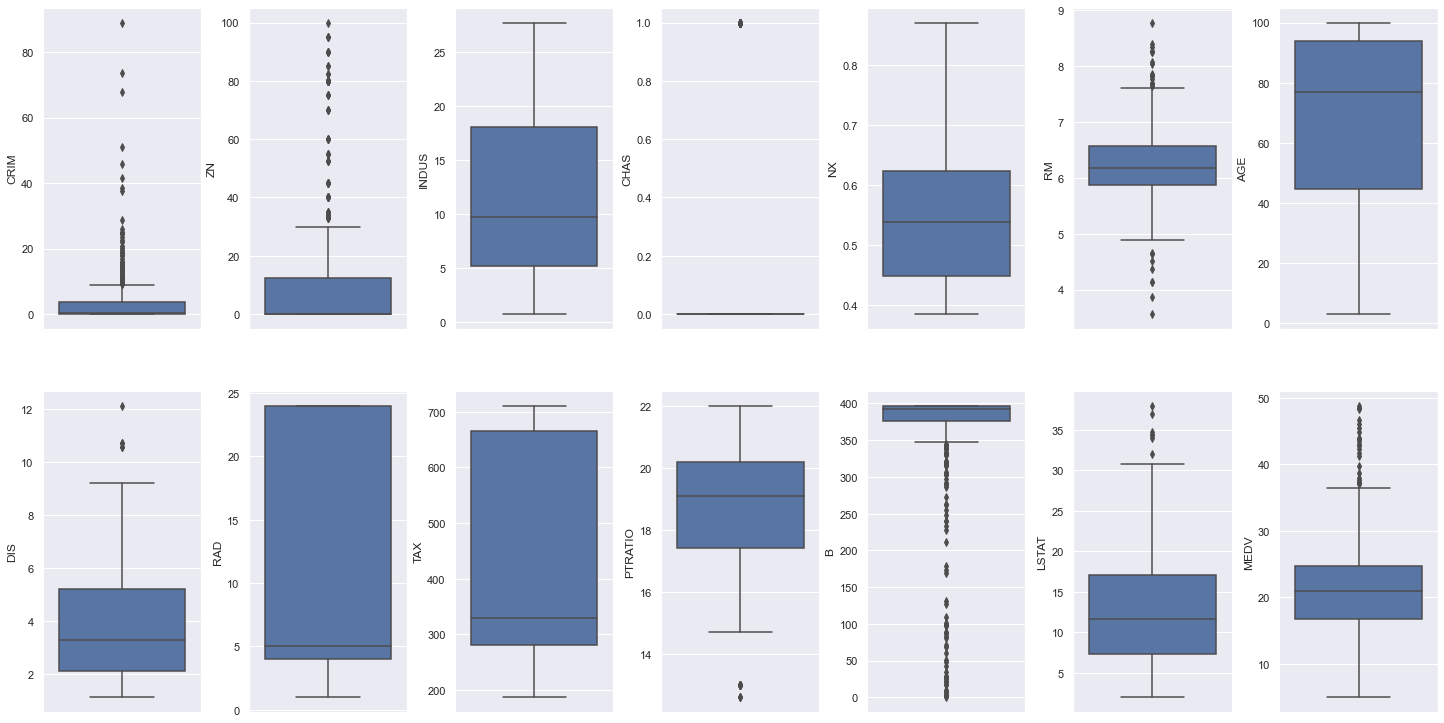

In [13]:
fig,axs = plt.subplots(nrows = 2,ncols=7,figsize = (20,10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k,data=data,ax=axs[index])
    index +=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

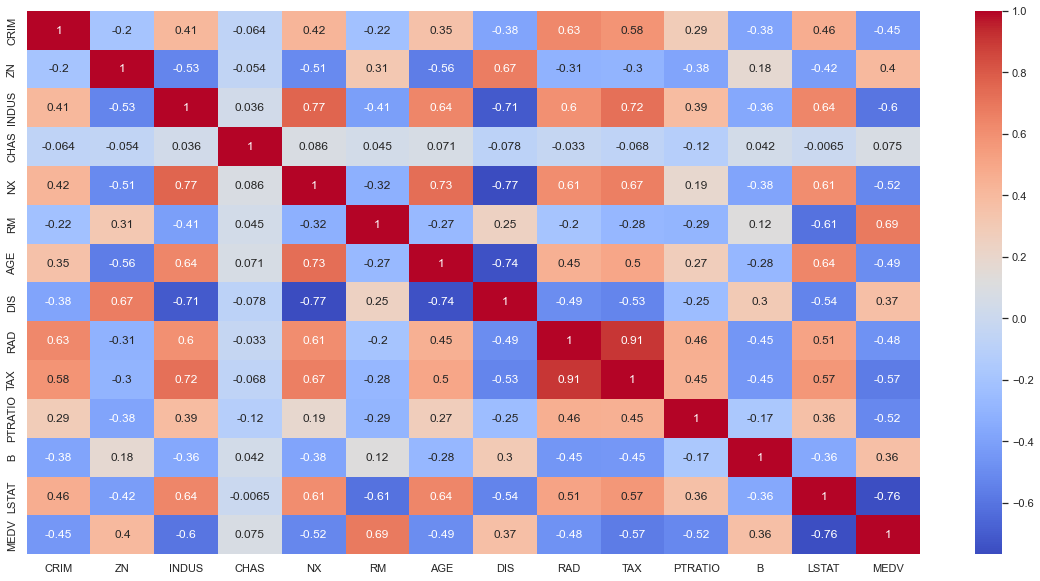

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap = 'coolwarm',annot = True)

In [15]:
col_impact=['INDUS', 'NX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
x = data.drop(['MEDV'],axis = 1)
y = data['MEDV']

In [16]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 490, dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = pd.DataFrame(scaler.fit_transform(x))

In [18]:
x_scaler

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.417401,0.301813,-1.291856,-0.250812,-0.139895,0.505040,-0.109432,0.121208,-0.980635,-0.667101,-1.527280,0.443535,-1.122679
1,-0.414992,-0.486924,-0.593329,-0.250812,-0.731821,0.269017,0.377488,0.537330,-0.865459,-0.988734,-0.341504,0.443535,-0.534772
2,-0.414995,-0.486924,-0.593329,-0.250812,-0.731821,1.439934,-0.255152,0.537330,-0.865459,-0.988734,-0.341504,0.399553,-1.256937
3,-0.414412,-0.486924,-1.310933,-0.250812,-0.826186,1.153335,-0.798939,1.056878,-0.750284,-1.107857,0.085376,0.419005,-1.410980
4,-0.410202,-0.486924,-1.310933,-0.250812,-0.826186,1.381694,-0.500390,1.056878,-0.750284,-1.107857,0.085376,0.443535,-1.073216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,-0.410939,-0.486924,0.119873,-0.250812,0.160357,0.532627,0.029180,-0.643288,-0.980635,-0.804093,1.176290,0.390476,-0.459871
486,-0.412931,-0.486924,0.119873,-0.250812,0.160357,-0.192299,0.299297,-0.733952,-0.980635,-0.804093,1.176290,0.443535,-0.543252
487,-0.411153,-0.486924,0.119873,-0.250812,0.160357,1.119618,0.807542,-0.790883,-0.980635,-0.804093,1.176290,0.443535,-1.029406
488,-0.405549,-0.486924,0.119873,-0.250812,0.160357,0.840682,0.747121,-0.685845,-0.980635,-0.804093,1.176290,0.406253,-0.910694


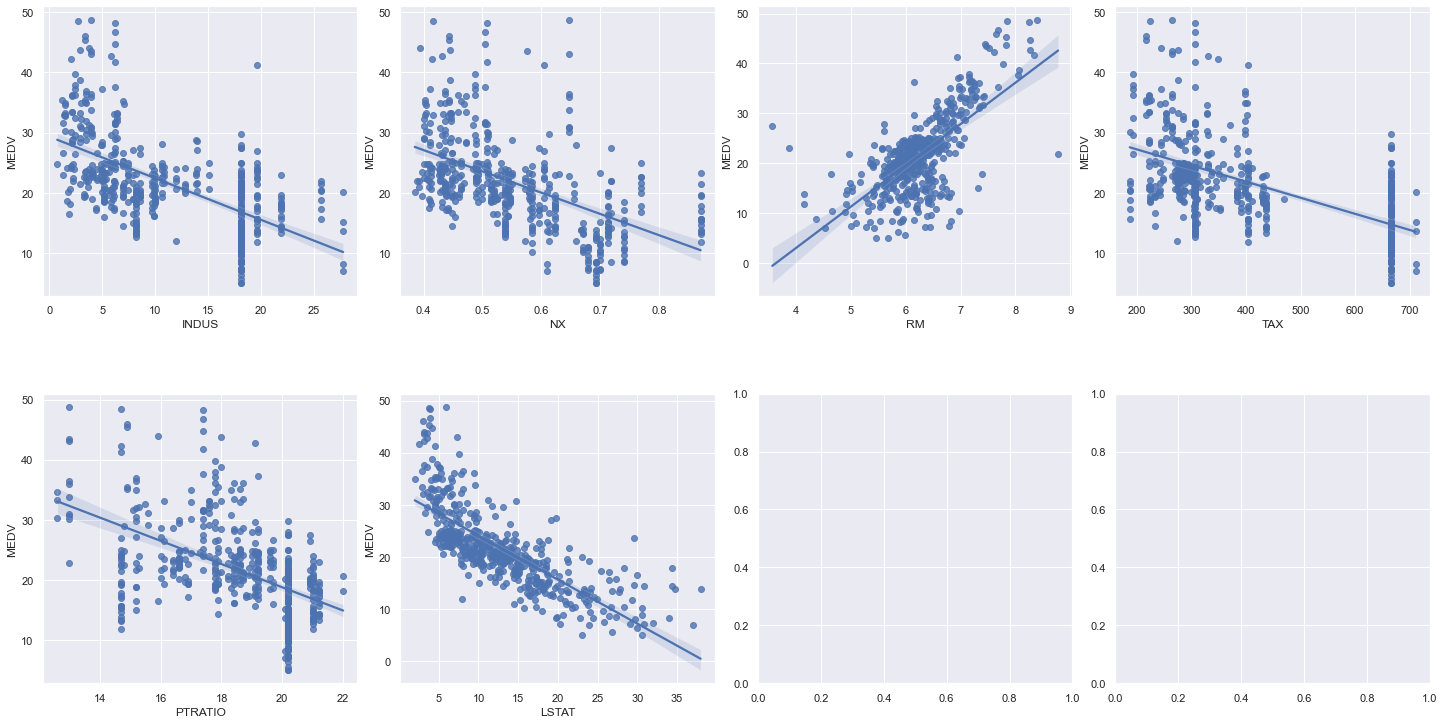

In [19]:
fig,axs = plt.subplots(nrows = 2,ncols=4, figsize = (20,10))
index = 0
axs = axs.flatten()
for k,v in enumerate(col_impact):
    sns.regplot(y=y,x=x[v],ax=axs[k])
plt.tight_layout(pad = 0.4,w_pad=0.5,h_pad = 5.0)

In [20]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

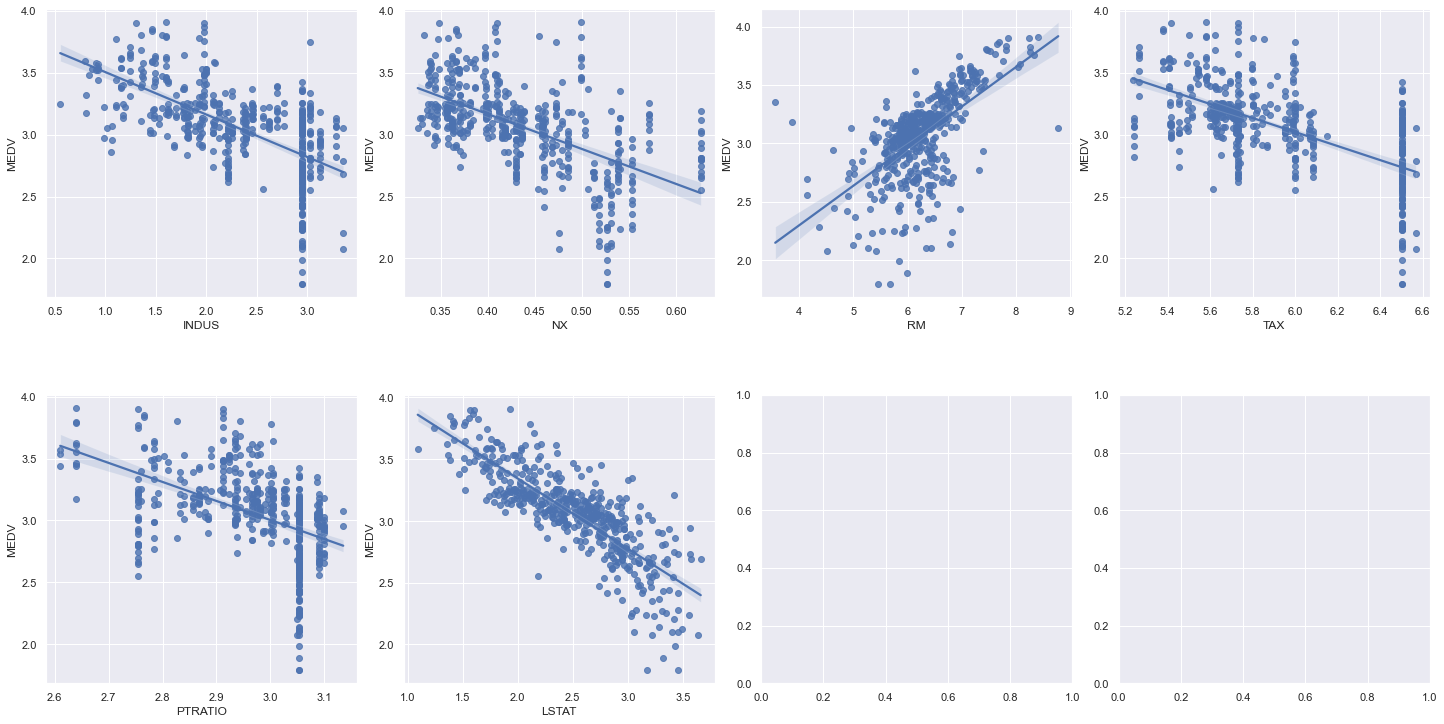

In [21]:
fig,axs = plt.subplots(nrows = 2,ncols=4, figsize = (20,10))
index = 0
axs = axs.flatten()
for k,v in enumerate(col_impact):
    sns.regplot(y=y,x=x[v],ax=axs[k])
plt.tight_layout(pad = 0.4,w_pad=0.5,h_pad = 5.0)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.2,random_state = 101)

In [23]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
43,-0.399837,-0.486924,-0.616809,-0.250812,-0.911972,-0.052831,-2.195724,0.894955,-0.750284,-1.042339,-0.294072,0.417167,-0.775023
36,-0.406944,-0.486924,-0.756221,-0.250812,-0.474462,-0.619898,-0.244490,-0.216634,-0.519934,-0.768356,0.322531,0.234543,-0.213967
138,-0.389458,-0.486924,1.581497,-0.250812,0.597868,-0.595376,1.063441,-1.027576,-0.635109,0.172716,1.271152,0.391017,1.186552
91,-0.413614,-0.486924,-1.130432,-0.250812,-0.560248,0.244496,0.199780,-0.352226,-0.865459,-0.821961,-0.341504,0.407334,-0.667617
448,0.481574,-0.486924,1.025317,-0.250812,0.863806,-0.055897,-0.102324,-0.413285,1.668395,1.536675,0.796842,0.443535,0.041829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,-0.403609,0.608543,-0.878023,-0.250812,-0.869079,0.791638,-0.884239,1.967167,-0.174408,-0.738575,0.559686,0.429270,-0.483896
326,-0.414637,-0.486924,-0.869218,-0.250812,-0.337203,-0.537137,-0.308465,0.844713,-0.519934,-1.095944,0.796842,0.420950,-0.334092
337,-0.416404,3.018572,-1.335881,-0.250812,-1.023494,0.596997,-1.371159,2.139432,-0.635109,-0.762400,-0.720952,0.379130,-0.979942
11,-0.404645,0.060810,-0.475929,-0.250812,-0.259996,-0.362419,0.519655,1.134922,-0.519934,-0.577759,-1.574711,0.443535,0.048895


In [24]:
y_train

43     3.246491
36     3.044522
138    2.660260
91     3.135494
464    3.109061
         ...   
63     3.258097
337    2.970414
348    3.238678
11     2.990720
362    3.081910
Name: MEDV, Length: 392, dtype: float64

In [25]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred_linear = linear.predict(x_test)
r2_score(y_test,y_pred_linear)

0.8273456385016119

In [27]:
ridge = Ridge(alpha = 0)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.8273456385016118

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_poly,y,test_size=0.2,random_state=101)
linear1 = LinearRegression()
linear1.fit(x_train1,y_train1)
y_pred_linear1 = linear1.predict(x_test1)
r2_score(y_test1,y_pred_linear1)


0.9067975408048116

In [29]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state = 111)
sgd.fit(x_train,y_train)
y_pred_sgd = sgd.predict(x_test)
r2_score(y_test,y_pred_sgd)

0.8104420424809258

In [30]:
from sklearn.tree import DecisionTreeRegressor
# lst = []
# for i in range(2,20):
#     dtr = DecisionTreeRegressor(max_depth = i,random_state = 101)
#     dtr.fit(x_train,y_train)
#     y_pred_dtr = dtr.predict(x_test)
#     a= r2_score(y_test,y_pred_dtr)
#     lst1 = [a,i]
#     lst.append(lst1)
# print(max(lst))
dtr = DecisionTreeRegressor(max_depth = 6,random_state = 101)
dtr.fit(x_train,y_train)
y_pred_dtr = dtr.predict(x_test)
r2_score(y_test,y_pred_dtr)

0.8284868691042376

In [31]:
from sklearn.ensemble import RandomForestRegressor
# lst = []
# for i in range(1,150):
#     rand_forest = RandomForestRegressor(n_estimators = i,max_depth = 7,random_state = 101,min_samples_split=2,min_samples_leaf=5)
#     rand_forest.fit(x_train,y_train)
#     y_pred_rf = rand_forest.predict(x_test)
#     a= r2_score(y_test,y_pred_rf)
#     lst1 = [a,i]
#     lst.append(lst1)
# print(max(lst))


rand_forest = RandomForestRegressor(n_estimators = 12,max_depth = 7,random_state = 101,min_samples_split=2,min_samples_leaf=5)
rand_forest.fit(x_train,y_train)
y_pred_rf = rand_forest.predict(x_test)
r2_score(y_test,y_pred_rf)

0.8754682083850772

In [32]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(rand_forest,x_test,y_test,cv = 20,scoring = 'neg_mean_squared_error')
cross

array([-0.0108444 , -0.02950429, -0.01973014, -0.00959381, -0.02223839,
       -0.01919793, -0.00850528, -0.05715366, -0.01420041, -0.01135947,
       -0.02763702, -0.0515439 , -0.02531597, -0.04599312, -0.00837105,
       -0.00728307, -0.10574001, -0.02650215, -0.01854608, -0.02099159])

In [33]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(n_estimators = 20,random_state = 1)
bag.fit(x_train,y_train)
y_pred_bag = bag.predict(x_test)
r2_score(y_test,y_pred_bag)

0.8742702112114757

In [34]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100,
    learning_rate=3,
    loss='linear',
    random_state=111)
ada.fit(x_train,y_train)
y_pred_ada = ada.predict(x_test)
r2_score(y_test,y_pred_ada)

0.8847236094655461

In [35]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
r2_score(y_test,y_pred_xgb)

0.9047810230830668

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
r2_score(y_test,y_pred_knn)

0.8534448209742664

In [37]:
from sklearn.svm import SVR
svc = SVR(kernel = 'rbf')
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
r2_score(y_test,y_pred_svc)

0.8506985895756549

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, 
                                min_samples_split=2, n_estimators=100, random_state=30)
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
r2_score(y_test,y_pred_gbr)

0.8830271510009305

In [39]:
gbr = GradientBoostingRegressor(n_estimators = 200,random_state = 101,max_depth = 5)
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
r2_score(y_test,y_pred_gbr)

0.8966856390263519

In [42]:
scores = cross_val_score(svc, x_test,y_test, cv=10, scoring='neg_mean_absolute_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.13 (+/- 0.04)


In [41]:
from sklearn.metrics import SCORERS
score = SCORERS.keys()
print(score)

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei